In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Input

In [2]:
column_names = ['MovieID', 'Title', 'Genres']
df_movie=pd.read_csv('movies.dat', sep = '::', engine='python', encoding='latin1', header=None,names=column_names)
df_movie.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df_rating=pd.read_csv('ratings.dat', sep = '::', engine='python', encoding='latin1')
df_rating.columns= ['ID','MovieID','Ratings','TimeStamp']
df_rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [4]:
df_user=pd.read_csv('users.dat', sep = '::', engine='python', encoding='latin1')
df_user.columns= ['UserID','Gender','Age','Occupation','Zip-code']
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


# Data Exploration

In [5]:
print(df_movie.shape,df_rating.shape,df_user.shape)

(3883, 3) (1000208, 4) (6039, 5)


In [7]:
df = pd.concat([df_movie, df_rating,df_user], axis=1)
df.head()

,MovieID,Title,Genres,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,5.0,Father of the Bride Part II (1995),Comedy,1,1197,3,978302268,6.0,F,50.0,9.0,55117


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000208 entries, 0 to 1000207
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   MovieID     3883 non-null     float64
 1   Title       3883 non-null     object 
 2   Genres      3883 non-null     object 
 3   ID          1000208 non-null  int64  
 4   MovieID     1000208 non-null  int64  
 5   Ratings     1000208 non-null  int64  
 6   TimeStamp   1000208 non-null  int64  
 7   UserID      6039 non-null     float64
 8   Gender      6039 non-null     object 
 9   Age         6039 non-null     float64
 10  Occupation  6039 non-null     float64
 11  Zip-code    6039 non-null     object 
dtypes: float64(4), int64(4), object(4)
memory usage: 91.6+ MB


In [9]:
df.isna().sum()

MovieID       996325
Title         996325
Genres        996325
ID                 0
MovieID            0
Ratings            0
TimeStamp          0
UserID        994169
Gender        994169
Age           994169
Occupation    994169
Zip-code      994169
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.describe()

,MovieID,ID,MovieID,Ratings,TimeStamp,UserID,Age,Occupation
count,3883.000000,3883.000000,3883.000000,3883.000000,3.883000e+03,3883.000000,3883.000000,3883.000000
mean,1986.049446,16.153747,1802.300026,3.561679,9.785893e+08,1943.000000,30.433685,8.205769
std,1146.778349,7.470140,1079.636630,1.095395,2.281501e+06,1121.069876,13.055283,6.331121
min,1.000000,1.000000,1.000000,1.000000,9.781252e+08,2.000000,1.000000,0.000000
25%,982.500000,10.000000,923.000000,3.000000,9.781535e+08,972.500000,25.000000,3.000000
50%,2010.000000,18.000000,1722.000000,4.000000,9.782245e+08,1943.000000,25.000000,7.000000
75%,2980.500000,23.000000,2692.000000,4.000000,9.782976e+08,2913.500000,35.000000,14.000000
max,3952.000000,28.000000,3952.000000,5.000000,1.009669e+09,3884.000000,56.000000,20.000000


In [12]:
df.columns

Index(['MovieID', 'Title', 'Genres', 'ID', 'MovieID', 'Ratings', 'TimeStamp',
       'UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'],
      dtype='object')

In [13]:
df.drop(['MovieID', 'Title','ID', 'MovieID','UserID'],axis=1,inplace=True)

In [14]:
df.head()

,Genres,Ratings,TimeStamp,Gender,Age,Occupation,Zip-code
0,Animation|Children's|Comedy,3,978302109,M,56.0,16.0,70072
1,Adventure|Children's|Fantasy,3,978301968,M,25.0,15.0,55117
2,Comedy|Romance,4,978300275,M,45.0,7.0,02460
3,Comedy|Drama,5,978824291,M,25.0,20.0,55455
4,Comedy,3,978302268,F,50.0,9.0,55117


# Data Analysis

<AxesSubplot: xlabel='Gender', ylabel='count'>

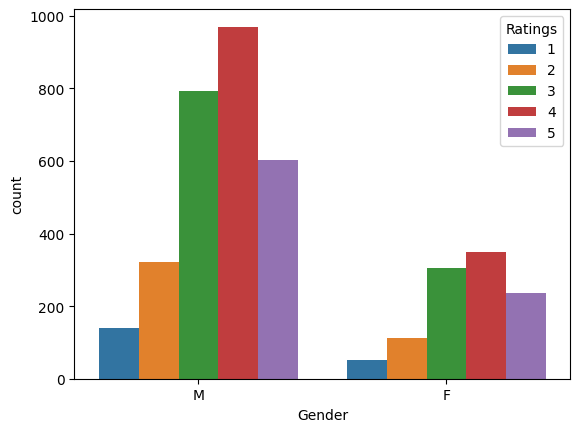

In [15]:
sns.countplot(x='Gender',hue='Ratings',data=df)

In [16]:
df['Zip-code'].value_counts()

48104    19
22903    16
55105    14
55455    13
37922    13
         ..
85035     1
08107     1
33445     1
94578     1
44515     1
Name: Zip-code, Length: 2457, dtype: int64

In [17]:
df['Occupation'].value_counts()

4.0     504
0.0     458
7.0     422
17.0    319
1.0     306
12.0    262
20.0    192
14.0    183
2.0     177
16.0    147
6.0     140
10.0    138
3.0     118
13.0     99
11.0     93
15.0     83
5.0      75
9.0      57
19.0     55
18.0     41
8.0      14
Name: Occupation, dtype: int64

In [18]:
df['Genres'].value_counts()

Drama                                  843
Comedy                                 521
Horror                                 178
Comedy|Drama                           162
Comedy|Romance                         142
                                      ... 
Action|Comedy|Crime|Horror|Thriller      1
Action|Drama|Thriller|War                1
Action|Adventure|Children's              1
Action|Adventure|Children's|Fantasy      1
Adventure|Crime|Sci-Fi|Thriller          1
Name: Genres, Length: 301, dtype: int64

In [19]:
df['TimeStamp'].value_counts()

978160933    10
978160993    10
978160792     9
978160848     9
978161068     9
             ..
978212046     1
978197100     1
978197842     1
978211867     1
978985238     1
Name: TimeStamp, Length: 2051, dtype: int64

In [20]:
df['Age'].value_counts()

25.0    1311
18.0     761
35.0     753
45.0     337
50.0     315
56.0     255
1.0      151
Name: Age, dtype: int64

In [21]:
df['Ratings'].value_counts()

4    1319
3    1099
5     840
2     432
1     193
Name: Ratings, dtype: int64

<AxesSubplot: xlabel='Occupation', ylabel='count'>

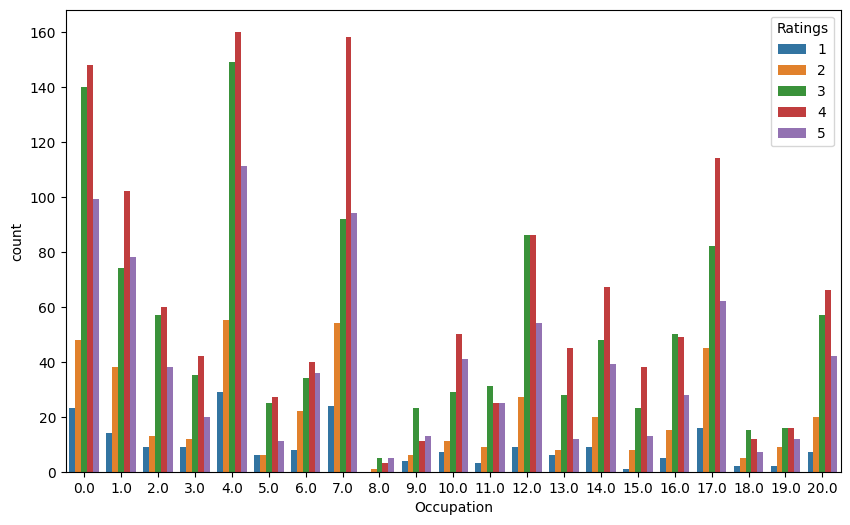

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x='Occupation',hue='Ratings',data=df)

In [23]:
df.drop(['TimeStamp','Zip-code'], axis=1, inplace=True)

<AxesSubplot: xlabel='Gender', ylabel='Age'>

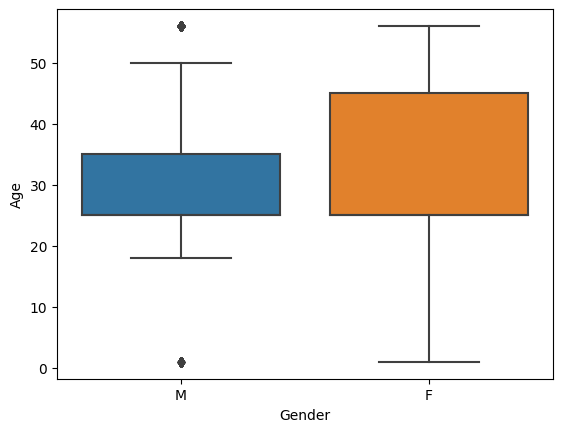

In [24]:
sns.boxplot(x='Gender', y='Age', data=df)

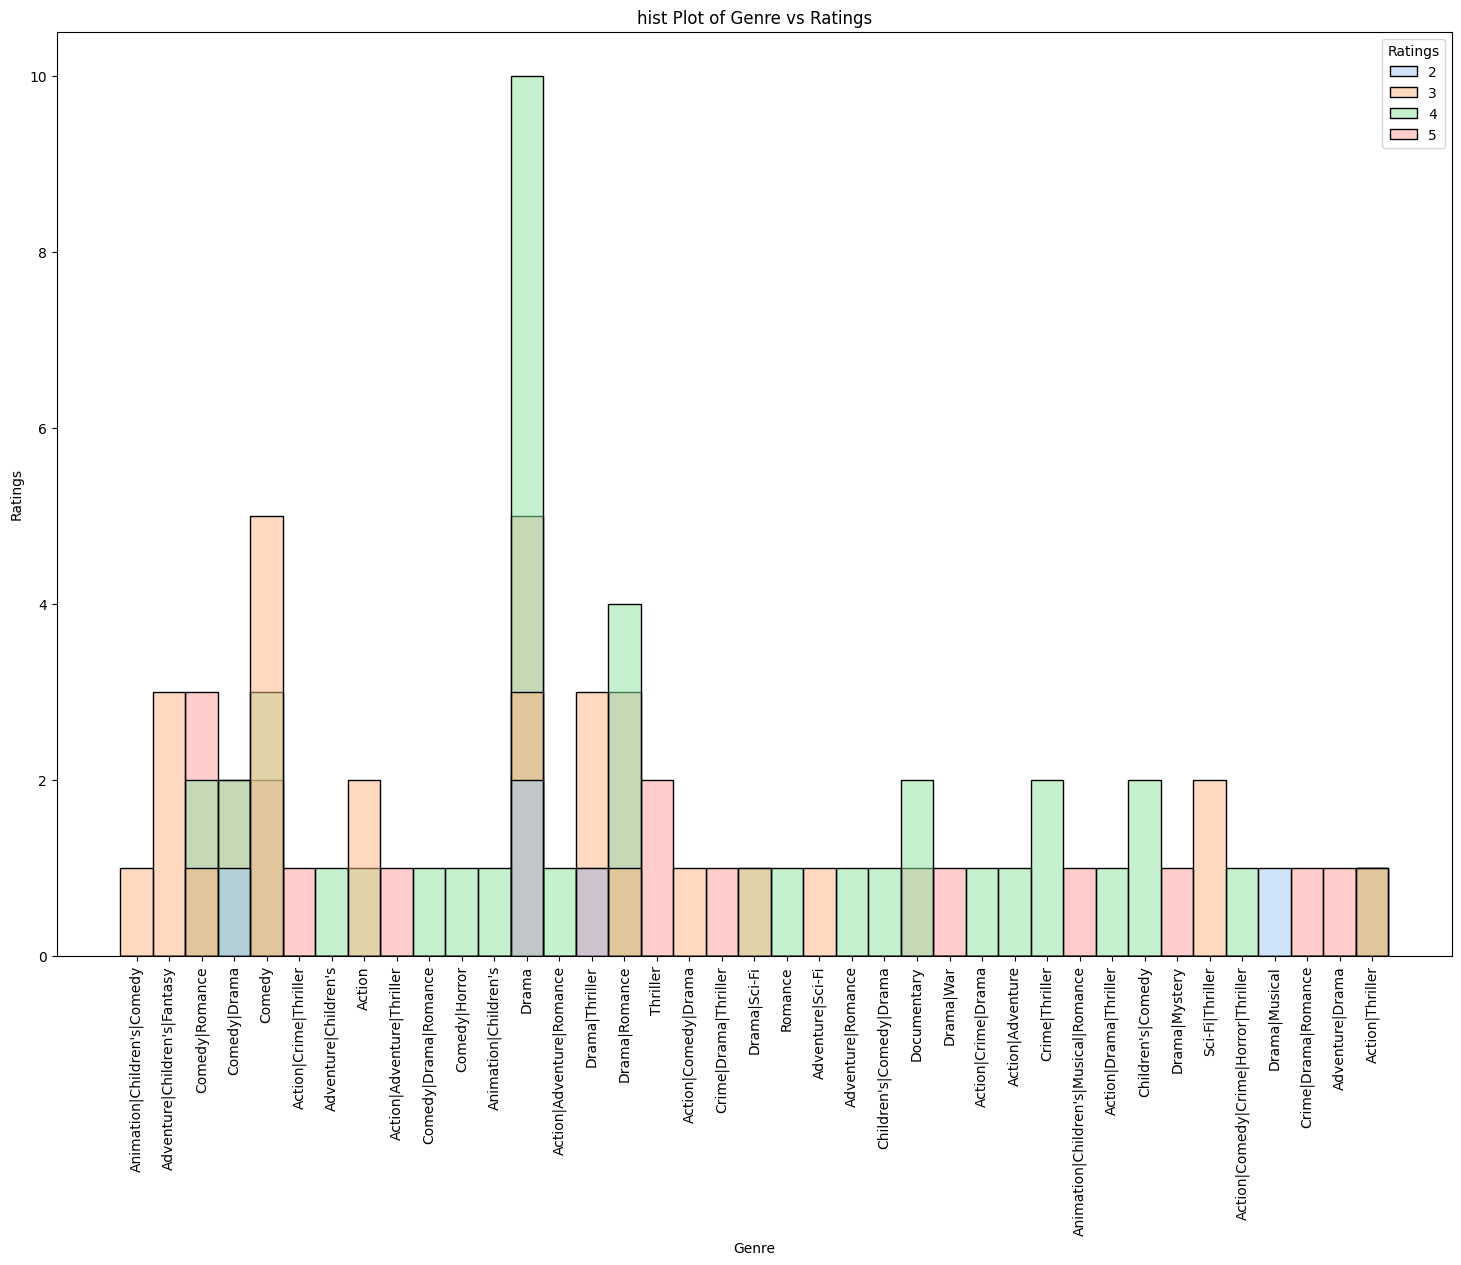

In [52]:
plt.figure(figsize=(18,12))
sns.histplot(data=df[:100], x='Genres', hue='Ratings',bins=10,palette='pastel');
plt.title('hist Plot of Genre vs Ratings');
plt.xlabel('Genre');
plt.ylabel('Ratings');
plt.xticks(rotation=90);

# Feature Engineering

In [26]:
df['Gender'] = df['Gender'].map({'M':0,'F':1})

In [27]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=True,dtype=int)


In [28]:
df.head()

,Genres,Ratings,Gender,Age,Occupation
0,Animation|Children's|Comedy,3,0,56.0,16.0
1,Adventure|Children's|Fantasy,3,0,25.0,15.0
2,Comedy|Romance,4,0,45.0,7.0
3,Comedy|Drama,5,0,25.0,20.0
4,Comedy,3,1,50.0,9.0


In [29]:
X = df.drop('Ratings',axis=1)
y = df['Ratings']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
X_train['Age'] = X_train['Age'].astype('category').cat.codes
X_test['Age'] = X_test['Age'].astype('category').cat.codes

In [32]:
encode_columns = ['Occupation']
encoded_X_train = pd.get_dummies(X_train,columns=encode_columns)
encoded_X_test = pd.get_dummies(X_test,columns=encode_columns)

In [33]:
print(encoded_X_train)
print(encoded_X_test)

                    Genres  Gender  Age  Occupation_0.0  Occupation_1.0  \
278                  Drama       0    5               0               0   
1073        Crime|Thriller       1    2               0               0   
999       Children's|Drama       0    2               0               0   
1503  Comedy|Drama|Romance       0    5               0               0   
2284       Action|Thriller       0    3               0               0   
...                    ...     ...  ...             ...             ...   
1130          Comedy|Drama       0    1               0               0   
1294               Romance       0    0               1               0   
860                 Comedy       0    3               0               0   
3507  Action|Horror|Sci-Fi       0    1               0               0   
3174                Comedy       0    2               0               0   

      Occupation_2.0  Occupation_3.0  Occupation_4.0  Occupation_5.0  \
278                0       

# Data Splitting

In [34]:
X_train = encoded_X_train
X_test = encoded_X_test

In [37]:
X_train.columns

Index(['Genres', 'Gender', 'Age', 'Occupation_0.0', 'Occupation_1.0',
       'Occupation_2.0', 'Occupation_3.0', 'Occupation_4.0', 'Occupation_5.0',
       'Occupation_6.0', 'Occupation_7.0', 'Occupation_8.0', 'Occupation_9.0',
       'Occupation_10.0', 'Occupation_11.0', 'Occupation_12.0',
       'Occupation_13.0', 'Occupation_14.0', 'Occupation_15.0',
       'Occupation_16.0', 'Occupation_17.0', 'Occupation_18.0',
       'Occupation_19.0', 'Occupation_20.0'],
      dtype='object')

# Model Training

In [42]:
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, BatchNormalization, Dropout, Concatenate
from tensorflow.keras.models import Model

In [40]:
num_genres = 301
num_occupation = 21
dims = 48

input_age = Input(shape=(1,))
input_occupation = Input(shape=(num_occupation,))
input_gender = Input(shape=(1,))
input_genres = Input(shape=(1,))

In [44]:
embedding_layer = Embedding(input_dim=num_genres, output_dim=dims)(input_genres)
flatten = Flatten()(embedding_layer)
concatenated = Concatenate()([input_age,input_occupation,input_gender,flatten])
batch_norm = BatchNormalization()(concatenated)

In [46]:
hidden1 = Dense(64, activation='relu')(batch_norm)
hidden1_bn = BatchNormalization()(hidden1)

hidden2 = Dense(32, activation='relu')(hidden1_bn)
hidden2_bn = BatchNormalization()(hidden2)

hidden3 = Dense(16, activation='relu')(hidden2_bn)
hidden3_bn = BatchNormalization()(hidden3)

hidden4 = Dense(8, activation='relu')(hidden3_bn)
hidden4_bn = BatchNormalization()(hidden4)

In [64]:
output = Dense(6,activation='softmax')(hidden4_bn)
model = Model(inputs=[input_age,input_occupation,input_gender,input_genres],outputs=output)

In [65]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])


In [59]:
X_train.columns


Index(['Genres', 'Gender', 'Age', 'Occupation_0.0', 'Occupation_1.0',
       'Occupation_2.0', 'Occupation_3.0', 'Occupation_4.0', 'Occupation_5.0',
       'Occupation_6.0', 'Occupation_7.0', 'Occupation_8.0', 'Occupation_9.0',
       'Occupation_10.0', 'Occupation_11.0', 'Occupation_12.0',
       'Occupation_13.0', 'Occupation_14.0', 'Occupation_15.0',
       'Occupation_16.0', 'Occupation_17.0', 'Occupation_18.0',
       'Occupation_19.0', 'Occupation_20.0'],
      dtype='object')

In [66]:
X_train_genres = X_train['Genres'].astype('category').cat.codes
X_test_genres = X_test['Genres'].astype('category').cat.codes
X_train_occupation = X_train.drop(['Age', 'Gender', 'Genres'], axis=1)
model.fit([X_train['Age'].astype(int),X_train_occupation,X_train['Gender'].astype(int),X_train_genres.astype(int)], y_train, epochs=250, validation_split=0.1)

Epoch 1/1000
88/88 [==============================] - 6s 11ms/step - loss: 1.7775 - sparse_categorical_accuracy: 0.2247 - val_loss: 1.8599 - val_sparse_categorical_accuracy: 0.2733
Epoch 2/1000
88/88 [==============================] - 1s 6ms/step - loss: 1.3799 - sparse_categorical_accuracy: 0.4143 - val_loss: 1.8202 - val_sparse_categorical_accuracy: 0.3248
Epoch 3/1000
88/88 [==============================] - 1s 6ms/step - loss: 1.2484 - sparse_categorical_accuracy: 0.4891 - val_loss: 1.7947 - val_sparse_categorical_accuracy: 0.3280
Epoch 4/1000
88/88 [==============================] - 1s 6ms/step - loss: 1.1694 - sparse_categorical_accuracy: 0.5166 - val_loss: 1.7753 - val_sparse_categorical_accuracy: 0.3215
Epoch 5/1000
88/88 [==============================] - 1s 7ms/step - loss: 1.1207 - sparse_categorical_accuracy: 0.5281 - val_loss: 1.7993 - val_sparse_categorical_accuracy: 0.3473
Epoch 6/1000
88/88 [==============================] - 1s 6ms/step - loss: 1.1044 - sparse_categoric

88/88 [==============================] - 1s 6ms/step - loss: 0.8999 - sparse_categorical_accuracy: 0.6132 - val_loss: 2.2129 - val_sparse_categorical_accuracy: 0.3087
Epoch 47/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.8913 - sparse_categorical_accuracy: 0.6125 - val_loss: 2.2138 - val_sparse_categorical_accuracy: 0.3023
Epoch 48/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.9012 - sparse_categorical_accuracy: 0.6075 - val_loss: 2.2595 - val_sparse_categorical_accuracy: 0.3023
Epoch 49/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.9018 - sparse_categorical_accuracy: 0.6097 - val_loss: 2.2478 - val_sparse_categorical_accuracy: 0.2862
Epoch 50/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.8814 - sparse_categorical_accuracy: 0.6204 - val_loss: 2.2534 - val_sparse_categorical_accuracy: 0.2765
Epoch 51/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.9082 - sparse_categorical_accura

88/88 [==============================] - 1s 6ms/step - loss: 0.8584 - sparse_categorical_accuracy: 0.6261 - val_loss: 2.3483 - val_sparse_categorical_accuracy: 0.2830
Epoch 92/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.8538 - sparse_categorical_accuracy: 0.6279 - val_loss: 2.3455 - val_sparse_categorical_accuracy: 0.2990
Epoch 93/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.8431 - sparse_categorical_accuracy: 0.6326 - val_loss: 2.3320 - val_sparse_categorical_accuracy: 0.3023
Epoch 94/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.8446 - sparse_categorical_accuracy: 0.6236 - val_loss: 2.3741 - val_sparse_categorical_accuracy: 0.2894
Epoch 95/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.8528 - sparse_categorical_accuracy: 0.6426 - val_loss: 2.3500 - val_sparse_categorical_accuracy: 0.3055
Epoch 96/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.8413 - sparse_categorical_accura

88/88 [==============================] - 1s 6ms/step - loss: 0.8283 - sparse_categorical_accuracy: 0.6462 - val_loss: 2.3836 - val_sparse_categorical_accuracy: 0.2894
Epoch 137/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.8328 - sparse_categorical_accuracy: 0.6440 - val_loss: 2.4320 - val_sparse_categorical_accuracy: 0.2926
Epoch 138/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.8337 - sparse_categorical_accuracy: 0.6290 - val_loss: 2.4010 - val_sparse_categorical_accuracy: 0.2958
Epoch 139/1000
88/88 [==============================] - 1s 8ms/step - loss: 0.8337 - sparse_categorical_accuracy: 0.6401 - val_loss: 2.3883 - val_sparse_categorical_accuracy: 0.2669
Epoch 140/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.8340 - sparse_categorical_accuracy: 0.6358 - val_loss: 2.3991 - val_sparse_categorical_accuracy: 0.2797
Epoch 141/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.8249 - sparse_categorical_a

88/88 [==============================] - 1s 7ms/step - loss: 0.8240 - sparse_categorical_accuracy: 0.6394 - val_loss: 2.4166 - val_sparse_categorical_accuracy: 0.2926
Epoch 182/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.8186 - sparse_categorical_accuracy: 0.6479 - val_loss: 2.3975 - val_sparse_categorical_accuracy: 0.2926
Epoch 183/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.8354 - sparse_categorical_accuracy: 0.6336 - val_loss: 2.3862 - val_sparse_categorical_accuracy: 0.2926
Epoch 184/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.8245 - sparse_categorical_accuracy: 0.6343 - val_loss: 2.4186 - val_sparse_categorical_accuracy: 0.2830
Epoch 185/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.8297 - sparse_categorical_accuracy: 0.6376 - val_loss: 2.4028 - val_sparse_categorical_accuracy: 0.2797
Epoch 186/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.8141 - sparse_categorical_a

88/88 [==============================] - 1s 8ms/step - loss: 0.7951 - sparse_categorical_accuracy: 0.6544 - val_loss: 2.4150 - val_sparse_categorical_accuracy: 0.2862
Epoch 227/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7947 - sparse_categorical_accuracy: 0.6626 - val_loss: 2.4222 - val_sparse_categorical_accuracy: 0.2733
Epoch 228/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7998 - sparse_categorical_accuracy: 0.6530 - val_loss: 2.4436 - val_sparse_categorical_accuracy: 0.2894
Epoch 229/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.8004 - sparse_categorical_accuracy: 0.6494 - val_loss: 2.4676 - val_sparse_categorical_accuracy: 0.3087
Epoch 230/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7943 - sparse_categorical_accuracy: 0.6458 - val_loss: 2.4800 - val_sparse_categorical_accuracy: 0.2958
Epoch 231/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.8084 - sparse_categorical_a

88/88 [==============================] - 1s 6ms/step - loss: 0.8019 - sparse_categorical_accuracy: 0.6497 - val_loss: 2.5885 - val_sparse_categorical_accuracy: 0.2894
Epoch 272/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7877 - sparse_categorical_accuracy: 0.6504 - val_loss: 2.6000 - val_sparse_categorical_accuracy: 0.2862
Epoch 273/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7777 - sparse_categorical_accuracy: 0.6555 - val_loss: 2.5483 - val_sparse_categorical_accuracy: 0.2765
Epoch 274/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7827 - sparse_categorical_accuracy: 0.6383 - val_loss: 2.5525 - val_sparse_categorical_accuracy: 0.2990
Epoch 275/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7888 - sparse_categorical_accuracy: 0.6540 - val_loss: 2.5483 - val_sparse_categorical_accuracy: 0.3119
Epoch 276/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7837 - sparse_categorical_a

88/88 [==============================] - 1s 7ms/step - loss: 0.7966 - sparse_categorical_accuracy: 0.6519 - val_loss: 2.5081 - val_sparse_categorical_accuracy: 0.3087
Epoch 317/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7797 - sparse_categorical_accuracy: 0.6597 - val_loss: 2.5403 - val_sparse_categorical_accuracy: 0.3023
Epoch 318/1000
88/88 [==============================] - 1s 8ms/step - loss: 0.7921 - sparse_categorical_accuracy: 0.6429 - val_loss: 2.5117 - val_sparse_categorical_accuracy: 0.3087
Epoch 319/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7759 - sparse_categorical_accuracy: 0.6522 - val_loss: 2.5217 - val_sparse_categorical_accuracy: 0.2926
Epoch 320/1000
88/88 [==============================] - 1s 8ms/step - loss: 0.7719 - sparse_categorical_accuracy: 0.6522 - val_loss: 2.4783 - val_sparse_categorical_accuracy: 0.3055
Epoch 321/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7933 - sparse_categorical_a

88/88 [==============================] - 1s 6ms/step - loss: 0.7703 - sparse_categorical_accuracy: 0.6562 - val_loss: 2.5825 - val_sparse_categorical_accuracy: 0.2990
Epoch 362/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7642 - sparse_categorical_accuracy: 0.6522 - val_loss: 2.6256 - val_sparse_categorical_accuracy: 0.3055
Epoch 363/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7771 - sparse_categorical_accuracy: 0.6580 - val_loss: 2.5647 - val_sparse_categorical_accuracy: 0.2862
Epoch 364/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7695 - sparse_categorical_accuracy: 0.6487 - val_loss: 2.5483 - val_sparse_categorical_accuracy: 0.2958
Epoch 365/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7695 - sparse_categorical_accuracy: 0.6583 - val_loss: 2.5970 - val_sparse_categorical_accuracy: 0.3087
Epoch 366/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7633 - sparse_categorical_a

88/88 [==============================] - 1s 8ms/step - loss: 0.7425 - sparse_categorical_accuracy: 0.6662 - val_loss: 2.6534 - val_sparse_categorical_accuracy: 0.2797
Epoch 407/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7563 - sparse_categorical_accuracy: 0.6658 - val_loss: 2.6816 - val_sparse_categorical_accuracy: 0.2862
Epoch 408/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7484 - sparse_categorical_accuracy: 0.6673 - val_loss: 2.6201 - val_sparse_categorical_accuracy: 0.3023
Epoch 409/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7796 - sparse_categorical_accuracy: 0.6426 - val_loss: 2.5929 - val_sparse_categorical_accuracy: 0.2958
Epoch 410/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7750 - sparse_categorical_accuracy: 0.6587 - val_loss: 2.5698 - val_sparse_categorical_accuracy: 0.3055
Epoch 411/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7643 - sparse_categorical_a

88/88 [==============================] - 1s 6ms/step - loss: 0.7594 - sparse_categorical_accuracy: 0.6665 - val_loss: 2.5858 - val_sparse_categorical_accuracy: 0.3119
Epoch 452/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7544 - sparse_categorical_accuracy: 0.6623 - val_loss: 2.5892 - val_sparse_categorical_accuracy: 0.3023
Epoch 453/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7779 - sparse_categorical_accuracy: 0.6501 - val_loss: 2.6053 - val_sparse_categorical_accuracy: 0.3119
Epoch 454/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7555 - sparse_categorical_accuracy: 0.6583 - val_loss: 2.6121 - val_sparse_categorical_accuracy: 0.3087
Epoch 455/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7553 - sparse_categorical_accuracy: 0.6633 - val_loss: 2.6267 - val_sparse_categorical_accuracy: 0.3023
Epoch 456/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7525 - sparse_categorical_a

88/88 [==============================] - 1s 7ms/step - loss: 0.7590 - sparse_categorical_accuracy: 0.6655 - val_loss: 2.5290 - val_sparse_categorical_accuracy: 0.2894
Epoch 497/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7528 - sparse_categorical_accuracy: 0.6597 - val_loss: 2.5943 - val_sparse_categorical_accuracy: 0.2958
Epoch 498/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7509 - sparse_categorical_accuracy: 0.6601 - val_loss: 2.5840 - val_sparse_categorical_accuracy: 0.3280
Epoch 499/1000
88/88 [==============================] - 1s 8ms/step - loss: 0.7618 - sparse_categorical_accuracy: 0.6576 - val_loss: 2.6243 - val_sparse_categorical_accuracy: 0.2765
Epoch 500/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7595 - sparse_categorical_accuracy: 0.6680 - val_loss: 2.6320 - val_sparse_categorical_accuracy: 0.2958
Epoch 501/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7631 - sparse_categorical_a

88/88 [==============================] - 1s 8ms/step - loss: 0.7410 - sparse_categorical_accuracy: 0.6716 - val_loss: 2.5415 - val_sparse_categorical_accuracy: 0.2894
Epoch 542/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7571 - sparse_categorical_accuracy: 0.6655 - val_loss: 2.6445 - val_sparse_categorical_accuracy: 0.2733
Epoch 543/1000
88/88 [==============================] - 1s 8ms/step - loss: 0.7417 - sparse_categorical_accuracy: 0.6741 - val_loss: 2.6329 - val_sparse_categorical_accuracy: 0.2862
Epoch 544/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7374 - sparse_categorical_accuracy: 0.6655 - val_loss: 2.5940 - val_sparse_categorical_accuracy: 0.3119
Epoch 545/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7570 - sparse_categorical_accuracy: 0.6547 - val_loss: 2.6347 - val_sparse_categorical_accuracy: 0.2990
Epoch 546/1000
88/88 [==============================] - 1s 8ms/step - loss: 0.7546 - sparse_categorical_a

88/88 [==============================] - 1s 7ms/step - loss: 0.7487 - sparse_categorical_accuracy: 0.6651 - val_loss: 2.7293 - val_sparse_categorical_accuracy: 0.3280
Epoch 587/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7502 - sparse_categorical_accuracy: 0.6590 - val_loss: 2.7130 - val_sparse_categorical_accuracy: 0.3215
Epoch 588/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7437 - sparse_categorical_accuracy: 0.6723 - val_loss: 2.7464 - val_sparse_categorical_accuracy: 0.3183
Epoch 589/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7410 - sparse_categorical_accuracy: 0.6637 - val_loss: 2.7213 - val_sparse_categorical_accuracy: 0.3248
Epoch 590/1000
88/88 [==============================] - 1s 8ms/step - loss: 0.7369 - sparse_categorical_accuracy: 0.6644 - val_loss: 2.7162 - val_sparse_categorical_accuracy: 0.3119
Epoch 591/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7435 - sparse_categorical_a

88/88 [==============================] - 1s 6ms/step - loss: 0.7488 - sparse_categorical_accuracy: 0.6691 - val_loss: 2.6996 - val_sparse_categorical_accuracy: 0.2958
Epoch 632/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7458 - sparse_categorical_accuracy: 0.6665 - val_loss: 2.6515 - val_sparse_categorical_accuracy: 0.2797
Epoch 633/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7293 - sparse_categorical_accuracy: 0.6701 - val_loss: 2.6736 - val_sparse_categorical_accuracy: 0.2958
Epoch 634/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7515 - sparse_categorical_accuracy: 0.6590 - val_loss: 2.6734 - val_sparse_categorical_accuracy: 0.2765
Epoch 635/1000
88/88 [==============================] - 1s 8ms/step - loss: 0.7354 - sparse_categorical_accuracy: 0.6655 - val_loss: 2.6872 - val_sparse_categorical_accuracy: 0.3087
Epoch 636/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7269 - sparse_categorical_a

88/88 [==============================] - 1s 6ms/step - loss: 0.7324 - sparse_categorical_accuracy: 0.6719 - val_loss: 2.7052 - val_sparse_categorical_accuracy: 0.2958
Epoch 677/1000
88/88 [==============================] - 1s 8ms/step - loss: 0.7246 - sparse_categorical_accuracy: 0.6755 - val_loss: 2.6951 - val_sparse_categorical_accuracy: 0.2926
Epoch 678/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7337 - sparse_categorical_accuracy: 0.6708 - val_loss: 2.7122 - val_sparse_categorical_accuracy: 0.2894
Epoch 679/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7640 - sparse_categorical_accuracy: 0.6587 - val_loss: 2.6820 - val_sparse_categorical_accuracy: 0.3023
Epoch 680/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7355 - sparse_categorical_accuracy: 0.6640 - val_loss: 2.7081 - val_sparse_categorical_accuracy: 0.2958
Epoch 681/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7415 - sparse_categorical_a

88/88 [==============================] - 1s 7ms/step - loss: 0.7465 - sparse_categorical_accuracy: 0.6580 - val_loss: 2.6692 - val_sparse_categorical_accuracy: 0.2958
Epoch 722/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7269 - sparse_categorical_accuracy: 0.6816 - val_loss: 2.6775 - val_sparse_categorical_accuracy: 0.3119
Epoch 723/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7283 - sparse_categorical_accuracy: 0.6819 - val_loss: 2.6619 - val_sparse_categorical_accuracy: 0.3344
Epoch 724/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7208 - sparse_categorical_accuracy: 0.6733 - val_loss: 2.7541 - val_sparse_categorical_accuracy: 0.2894
Epoch 725/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7652 - sparse_categorical_accuracy: 0.6644 - val_loss: 2.7197 - val_sparse_categorical_accuracy: 0.2926
Epoch 726/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7265 - sparse_categorical_a

88/88 [==============================] - 1s 8ms/step - loss: 0.7137 - sparse_categorical_accuracy: 0.6701 - val_loss: 2.7456 - val_sparse_categorical_accuracy: 0.2990
Epoch 767/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7323 - sparse_categorical_accuracy: 0.6623 - val_loss: 2.7820 - val_sparse_categorical_accuracy: 0.2958
Epoch 768/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7087 - sparse_categorical_accuracy: 0.6855 - val_loss: 2.8501 - val_sparse_categorical_accuracy: 0.2926
Epoch 769/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7175 - sparse_categorical_accuracy: 0.6776 - val_loss: 2.8221 - val_sparse_categorical_accuracy: 0.3023
Epoch 770/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7222 - sparse_categorical_accuracy: 0.6694 - val_loss: 2.8420 - val_sparse_categorical_accuracy: 0.3055
Epoch 771/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7274 - sparse_categorical_a

88/88 [==============================] - 1s 8ms/step - loss: 0.7141 - sparse_categorical_accuracy: 0.6805 - val_loss: 2.7894 - val_sparse_categorical_accuracy: 0.2926
Epoch 812/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7255 - sparse_categorical_accuracy: 0.6701 - val_loss: 2.7842 - val_sparse_categorical_accuracy: 0.3023
Epoch 813/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7277 - sparse_categorical_accuracy: 0.6794 - val_loss: 2.8128 - val_sparse_categorical_accuracy: 0.2990
Epoch 814/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7096 - sparse_categorical_accuracy: 0.6862 - val_loss: 2.8553 - val_sparse_categorical_accuracy: 0.2830
Epoch 815/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7315 - sparse_categorical_accuracy: 0.6691 - val_loss: 2.8196 - val_sparse_categorical_accuracy: 0.2958
Epoch 816/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7131 - sparse_categorical_a

88/88 [==============================] - 1s 7ms/step - loss: 0.7214 - sparse_categorical_accuracy: 0.6719 - val_loss: 2.7921 - val_sparse_categorical_accuracy: 0.2926
Epoch 857/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7275 - sparse_categorical_accuracy: 0.6708 - val_loss: 2.7064 - val_sparse_categorical_accuracy: 0.3087
Epoch 858/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7244 - sparse_categorical_accuracy: 0.6676 - val_loss: 2.7129 - val_sparse_categorical_accuracy: 0.2990
Epoch 859/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7173 - sparse_categorical_accuracy: 0.6687 - val_loss: 2.6755 - val_sparse_categorical_accuracy: 0.3055
Epoch 860/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7280 - sparse_categorical_accuracy: 0.6730 - val_loss: 2.6997 - val_sparse_categorical_accuracy: 0.3119
Epoch 861/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7364 - sparse_categorical_a

88/88 [==============================] - 1s 6ms/step - loss: 0.7129 - sparse_categorical_accuracy: 0.6712 - val_loss: 2.7335 - val_sparse_categorical_accuracy: 0.2958
Epoch 902/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7298 - sparse_categorical_accuracy: 0.6716 - val_loss: 2.7123 - val_sparse_categorical_accuracy: 0.2990
Epoch 903/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7250 - sparse_categorical_accuracy: 0.6691 - val_loss: 2.7382 - val_sparse_categorical_accuracy: 0.3215
Epoch 904/1000
88/88 [==============================] - 1s 8ms/step - loss: 0.7112 - sparse_categorical_accuracy: 0.6805 - val_loss: 2.6954 - val_sparse_categorical_accuracy: 0.3023
Epoch 905/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7119 - sparse_categorical_accuracy: 0.6769 - val_loss: 2.6996 - val_sparse_categorical_accuracy: 0.3087
Epoch 906/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7216 - sparse_categorical_a

88/88 [==============================] - 1s 6ms/step - loss: 0.7230 - sparse_categorical_accuracy: 0.6805 - val_loss: 2.7512 - val_sparse_categorical_accuracy: 0.3023
Epoch 947/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7127 - sparse_categorical_accuracy: 0.6776 - val_loss: 2.7049 - val_sparse_categorical_accuracy: 0.3023
Epoch 948/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7299 - sparse_categorical_accuracy: 0.6658 - val_loss: 2.6932 - val_sparse_categorical_accuracy: 0.3087
Epoch 949/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7325 - sparse_categorical_accuracy: 0.6691 - val_loss: 2.7170 - val_sparse_categorical_accuracy: 0.3055
Epoch 950/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7107 - sparse_categorical_accuracy: 0.6683 - val_loss: 2.7419 - val_sparse_categorical_accuracy: 0.3087
Epoch 951/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7217 - sparse_categorical_a

88/88 [==============================] - 1s 6ms/step - loss: 0.7175 - sparse_categorical_accuracy: 0.6805 - val_loss: 2.7658 - val_sparse_categorical_accuracy: 0.3151
Epoch 992/1000
88/88 [==============================] - 1s 7ms/step - loss: 0.7309 - sparse_categorical_accuracy: 0.6662 - val_loss: 2.7661 - val_sparse_categorical_accuracy: 0.3151
Epoch 993/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7143 - sparse_categorical_accuracy: 0.6819 - val_loss: 2.8426 - val_sparse_categorical_accuracy: 0.2990
Epoch 994/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7205 - sparse_categorical_accuracy: 0.6733 - val_loss: 2.8313 - val_sparse_categorical_accuracy: 0.3055
Epoch 995/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7102 - sparse_categorical_accuracy: 0.6826 - val_loss: 2.7719 - val_sparse_categorical_accuracy: 0.2926
Epoch 996/1000
88/88 [==============================] - 1s 6ms/step - loss: 0.7151 - sparse_categorical_a

In [69]:
X_test_occupation = X_test.drop(['Age', 'Gender', 'Genres'], axis=1)
preds = model.predict([X_test['Age'].astype(int),X_test_occupation,X_test['Gender'].astype(int),X_test_genres.astype(int)])
pred_labels = preds.argmax(axis=1)

25/25 [==============================] - 0s 3ms/step


# Model Evaluation

In [70]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test,pred_labels))
print(classification_report(y_test,pred_labels))

0.2767052767052767
              precision    recall  f1-score   support

           1       0.03      0.02      0.03        41
           2       0.12      0.19      0.15        75
           3       0.35      0.32      0.33       231
           4       0.32      0.31      0.32       262
           5       0.26      0.27      0.27       168

    accuracy                           0.28       777
   macro avg       0.22      0.22      0.22       777
weighted avg       0.28      0.28      0.28       777

